In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/home/anu/Downloads/fakenews.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 5)

In [4]:
x=df.drop('label',axis=1)
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [5]:
y=df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [6]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
df=df.dropna()
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
#reseting index after removing null value to correct the index

messages=df.copy()
messages.reset_index(inplace=True)

In [13]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word)for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [15]:
corpus[3]


'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()
print(X.shape)

(18285, 5000)


In [17]:
y=messages['label']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)



In [19]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics

fake_nws=classifier.fit(X_train,y_train)
pred=fake_nws.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy:%0.3f"%score)
cm=metrics.confusion_matrix(y_test,pred)


accuracy:0.900


              precision    recall  f1-score   support

           0       0.88      0.96      0.91      3389
           1       0.94      0.83      0.88      2646

    accuracy                           0.90      6035
   macro avg       0.91      0.89      0.90      6035
weighted avg       0.90      0.90      0.90      6035



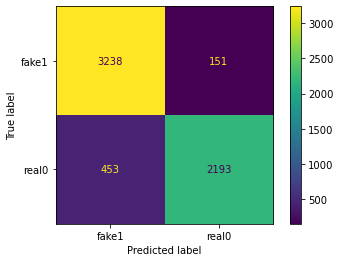

In [20]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(classifier,
                     X_test,
                     y_test,
                     display_labels=["fake1","real0"])


from sklearn.metrics import classification_report
print(classification_report(y_test,pred))